<a href="https://colab.research.google.com/github/abergues/SalsaApp/blob/eero/read_JSON_and_save_one_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading the JSON data to Colab with Python

This file reads all json files under output_op.
If some clips should not be included remove them from output_op.
The results are parsed to a pandas DataFrame with one row for each clip-frame-person and 58 columns named after the openpose body-joints x and y. the content is the x and y cordinates of each joint.

This file is saved as CSV, which can later be opened and recoded.

In [ ]:
# ?drive


In [ ]:
import pandas as pd
import json
import csv
from pathlib import Path
import os
from os.path import exists, join, basename, splitext
from google.colab import drive
import glob            # help for finding files
# import pandas as pd
# from re import split   # regular expression string splitter
# import re


# When you mount it, you will be asked for permission, so allow it, copy the key, paste(Ctrl+V) it in the input field on the Colab side, and press Enter.
drive.mount('/gdrive')

# Google Drive root directory
root_path = "/gdrive/My Drive/DSR/DanceApp"



## Make  a list of all json_files
json_files = glob.glob(os.path.join(root_path, "output_op", '*', '*.json'), recursive=True)
json_files = sorted(json_files, reverse=False)
#print(json_files)

## Make a  list of the directories that contain the jpg and json file:
directory_list = list()
for root, dirs, files in os.walk(root_path + "/output_op", topdown=False):
   for name in dirs:
     directory_list.append(os.path.join(root, name))

print(json_files[:3])
print(json_files[-3:])
       
print("n of folders : "  , len(directory_list))
print("n of json files: ", len(json_files))


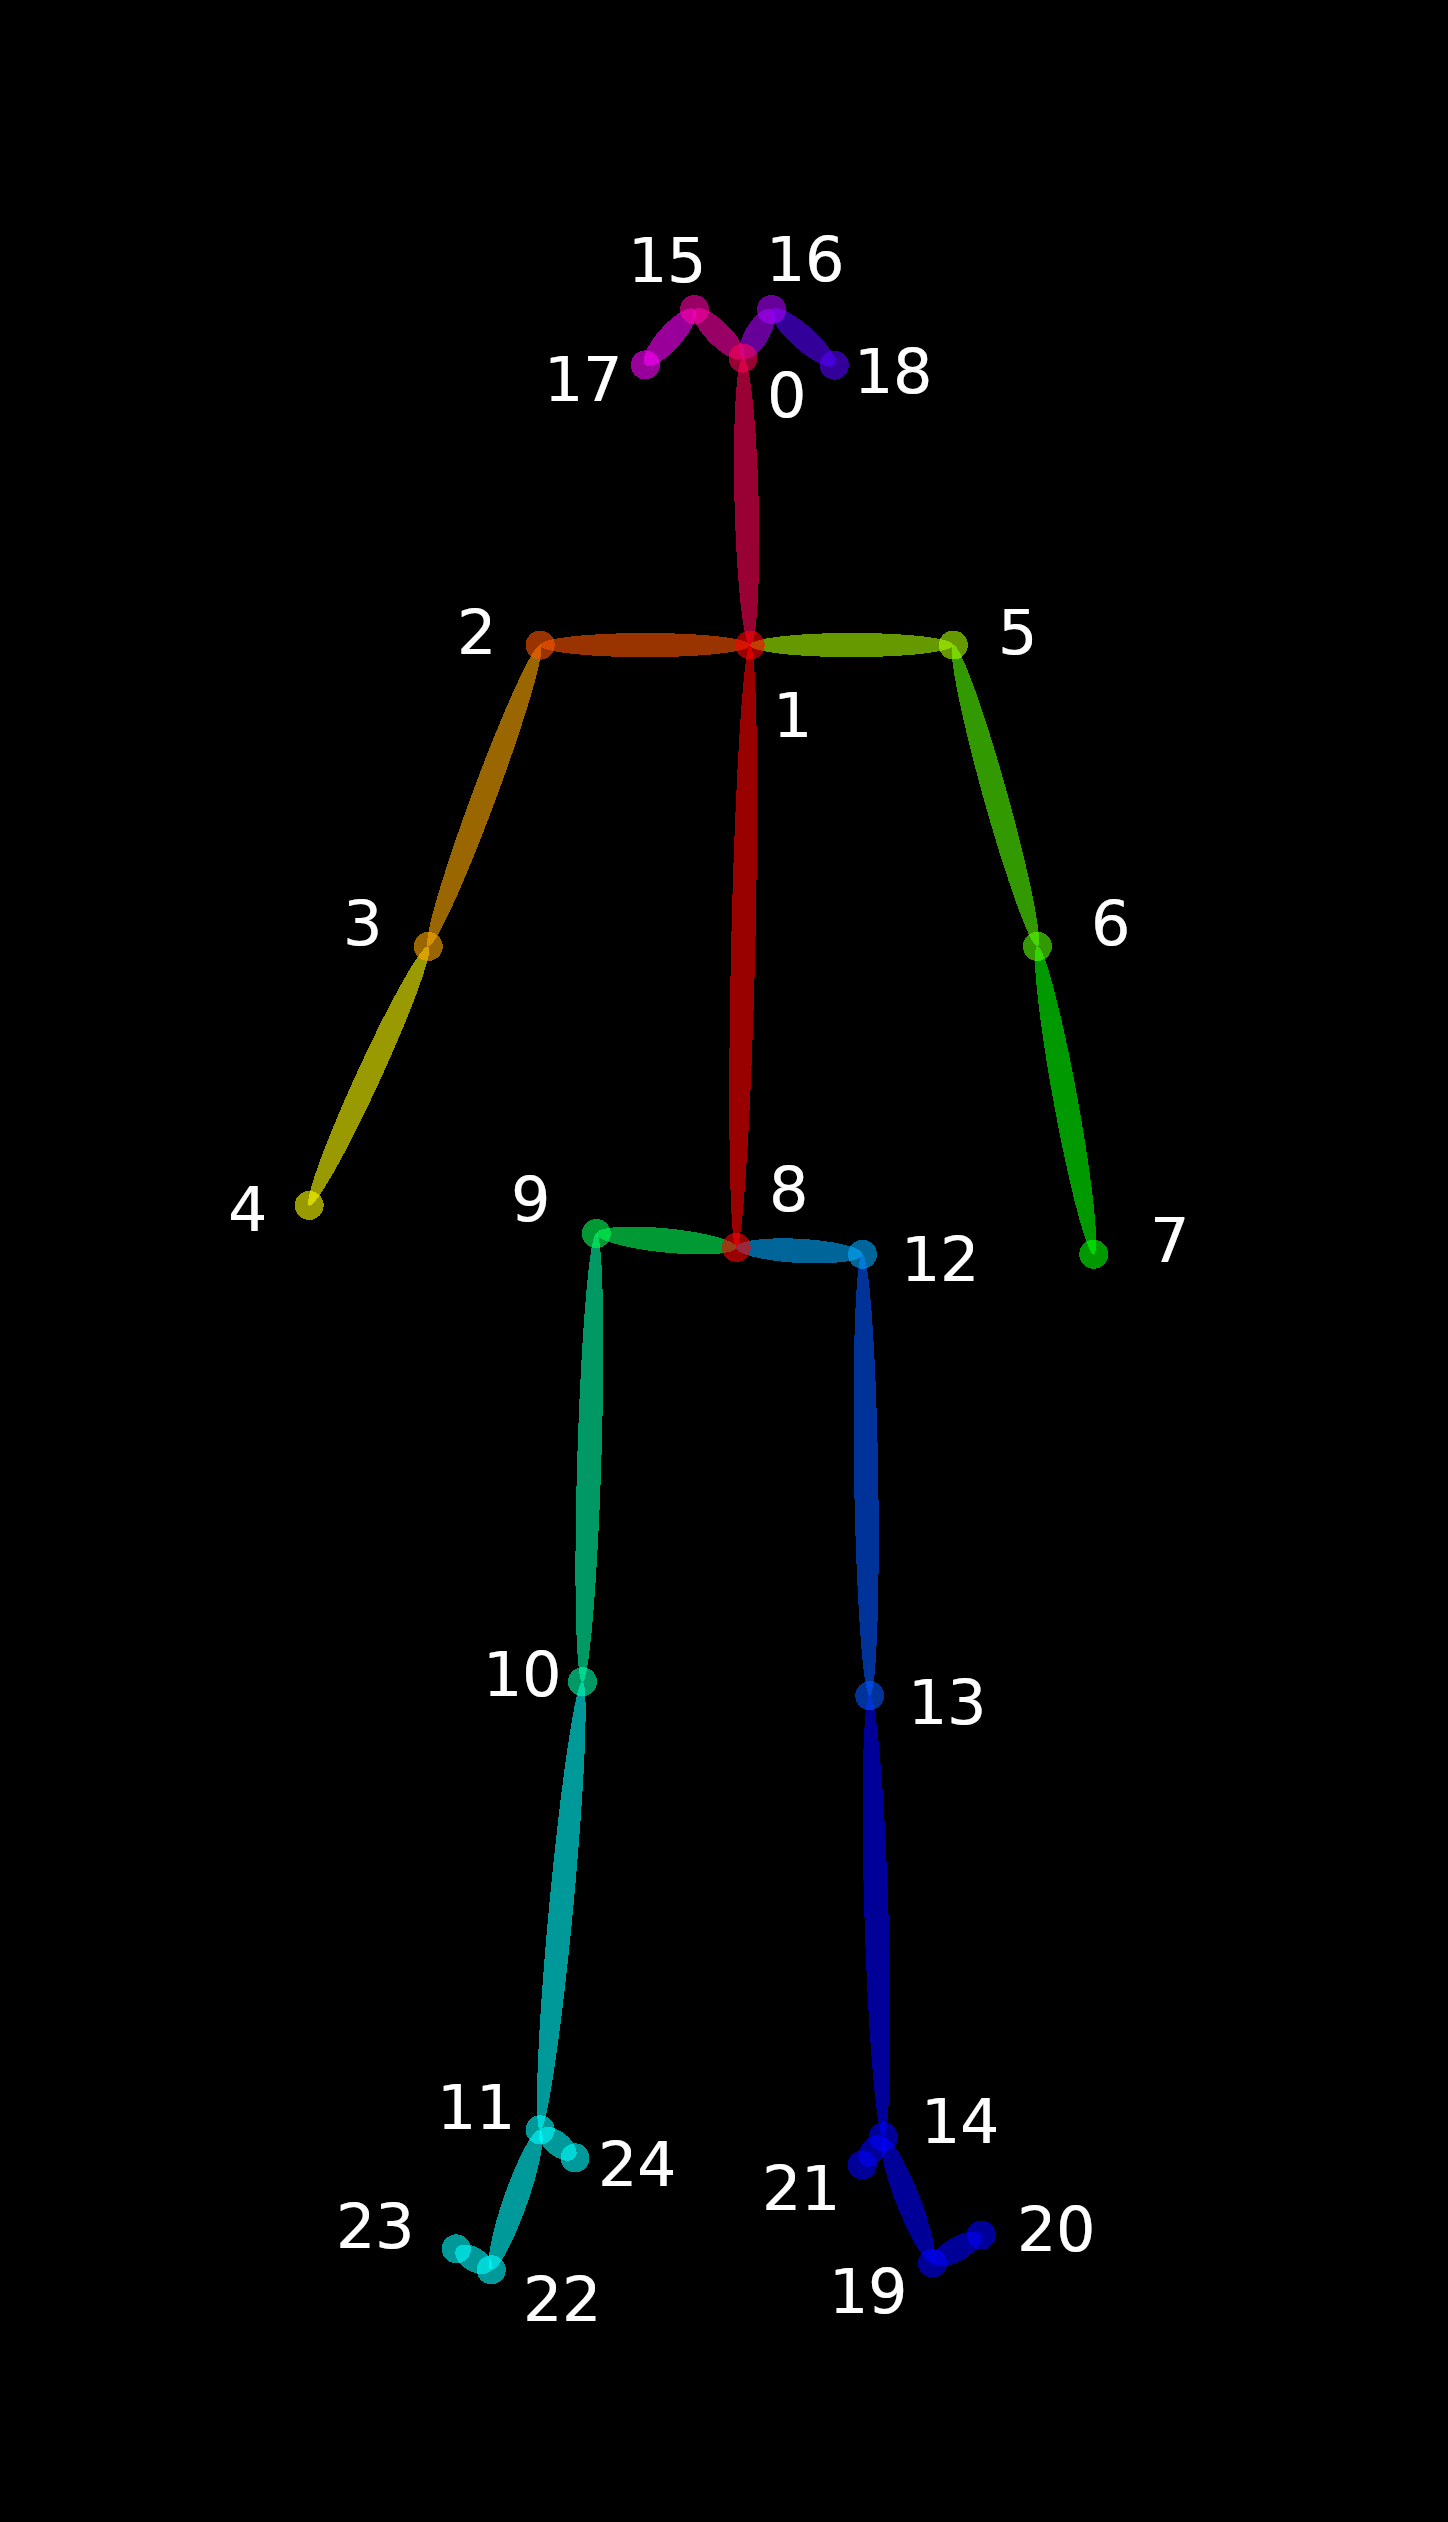

In [ ]:

# use only a few files until this works.
json_files_tmp = json_files[:]
json_files_tmp


# here I define my pandas Dataframe with the columns I want to get from the json
#pose_df = pd.DataFrame(columns=['clip_name', 'frame_nr' ,  'json_content'])  #'op_version', 'people',
pose_df = pd.DataFrame( columns = [
            "clip_name" , 
            "frame_nr",
            "person_id",
             "nose_x",    
             "nose_y",    
             "neck_x",    
             "neck_y",    
             "rshoulder_x",
             "rshoulder_y",
             "relbow_x",  
             "relbow_y",  
             "rwrist_x",  
             "rwrist_y",  
             "lshoulder_x",
             "lshoulder_y",
             "lelbow_x",  
             "lelbow_y",  
             "lwrist_x",  
             "lwrist_y",  
             "midhip_x",  
             "midhip_y",  
             "rhip_x",    
             "rhip_y",    
             "rknee_x",   
             "rknee_y",   
             "rankle_x",  
             "rankle_y",  
             "lhip_x",    
             "lhip_y",    
             "lknee_x",   
             "lknee_y",   
             "lankle_x",  
             "lankle_y",  
             "reye_x",    
             "reye_y",    
             "leye_x",    
             "leye_y",    
             "rear_x",    
             "rear_y",    
             "lear_x",    
             "lear_y",    
             "lbigtoe_x", 
             "lbigtoe_y", 
             "lsmalltoe_x",
              "lsmalltoe_y",
              "lheal_x",   
             "lheal_y",   
             "rbigtoe_x", 
             "rbigtoe_y", 
             "rsmalltoe_x",
             "rsmalltoe_y",
             "rheal_x",   
             "rheal_y",   
             "background_x",
             "background_y"
             ]
)


# pose_dict = pose_dict.append.pd.read_json(file) #reads every file, but result contains only the last one.
   # I have also read that it is quite resurce consuming to use pandas to read json. A more efficient way to
   #do it is to read the content, work with lists and dict, and then in the end convert everything to DF.

# data_all = list({'clip_name': " " , 'frame_nr': " ", 'json_content': " "})
# print(len(data_all))

for file_name in json_files_tmp:              # loops through each frame
   # get the folder name and frame number and add to json
   print(file_name)
   # parse info from file_name
   *_ , clip_name, _,  frame_nr, extention = split(r'[-\./]' , file_name) 
   print(clip_name, " ", frame_nr)   
   json_text = pd.read_json(file_name)  
   print(json_text)

   n_of_people =  json_text["people"].count() 
   for i in range(0, n_of_people):           # loops through all people in one frame
      print(i)
      pose_keypoints = json_text.loc[i,"people"]["pose_keypoints_2d"]
      print(pose_keypoints)   
      # parsing each keypoint as a variable
      person_id = i
      nose_x, nose_y           = pose_keypoints[0:2]
      neck_x, neck_y           = pose_keypoints[2:4]
      rshoulder_x, rshoulder_y = pose_keypoints[4:6]
      relbow_x, relbow_y       = pose_keypoints[6:8]
      rwrist_x, rwrist_y       = pose_keypoints[8:10]
      lshoulder_x, lshoulder_y = pose_keypoints[10:12]
      lelbow_x, lelbow_y       = pose_keypoints[12:14]
      lwrist_x, lwrist_y       = pose_keypoints[14:16]
      midhip_x, midhip_y       = pose_keypoints[16:18]
      rhip_x ,  rhip_y         = pose_keypoints[18:20]
      rknee_x , rknee_y        = pose_keypoints[20:22] 
      rankle_x , rankle_y      = pose_keypoints[22:24]
      lhip_x  , lhip_y         = pose_keypoints[24:26]
      lknee_x , lknee_y        = pose_keypoints[26:28]
      lankle_x , lankle_y      = pose_keypoints[28:30]
      reye_x ,  reye_y         = pose_keypoints[30:32]
      leye_x ,  leye_y         = pose_keypoints[32:34]
      rear_x ,  rear_y         = pose_keypoints[34:36]
      lear_x ,  lear_y         = pose_keypoints[36:38]
      lbigtoe_x , lbigtoe_y    = pose_keypoints[28:30]
      lsmalltoe_x ,lsmalltoe_y = pose_keypoints[40:42]
      lheal_x , lheal_y        = pose_keypoints[42:44]
      rbigtoe_x , rbigtoe_y    = pose_keypoints[44:46]
      rsmalltoe_x ,rsmalltoe_y = pose_keypoints[46:48]
      rheal_x , rheal_y        = pose_keypoints[48:50]
      background_x, background_y = pose_keypoints[50:52]
      
      # just a small check
      print("person_id: ", person_id,
            "nose: ", nose_x, nose_y, 
            "neck:", neck_x, neck_y,
            "Lwrist:", lwrist_x, lwrist_y,
            "Rwrist:", rwrist_x, rwrist_y
            )
      
      # adding variables into a Dict.
      posedata = {"index":   clip_name + "." + frame_nr + ".p" + str(person_id),
               "clip_name": clip_name , 
              "frame_nr":  frame_nr,
              "person_id" : person_id,
              "index":   clip_name + "." + frame_nr + ".p" + str(person_id),
              "nose_x":    nose_x,
              "nose_y":    nose_y,
              "neck_x":    neck_x ,
              "neck_y":    neck_y ,
              "rshoulder_x":    rshoulder_x ,
              "rshoulder_y":    rshoulder_y ,
              "relbow_x":    relbow_x ,
              "relbow_y":    relbow_y ,
              "rwrist_x":    rwrist_x ,
              "rwrist_y":    rwrist_y ,
              "lshoulder_x":    lshoulder_x ,
              "lshoulder_y":    lshoulder_y ,
              "lelbow_x":    lelbow_x ,
              "lelbow_y":    lelbow_y ,
              "lwrist_x":    lwrist_x ,
              "lwrist_y":    lwrist_y ,
              "midhip_x":    midhip_x ,
              "midhip_y":    midhip_y ,
              "rhip_x":    rhip_x ,
              "rhip_y":    rhip_y ,
              "rknee_x":    rknee_x ,
              "rknee_y":    rknee_y ,
              "rankle_x":    rankle_x ,
              "rankle_y":    rankle_y ,
              "lhip_x":    lhip_x ,
              "lhip_y":    lhip_y ,
              "lknee_x":    lknee_x ,
              "lknee_y":    lknee_y ,
              "lankle_x":    lankle_x ,
              "lankle_y":    lankle_y ,
              "reye_x":    reye_x ,
              "reye_y":    reye_y ,
              "leye_x":    leye_x ,
              "leye_y":    leye_y ,
              "rear_x":    rear_x ,
              "rear_y":    rear_y ,
              "lear_x":    lear_x ,
              "lear_y":    lear_y ,
              "lbigtoe_x":    lbigtoe_x ,
              "lbigtoe_y":    lbigtoe_y ,
              "lsmalltoe_x":    lsmalltoe_x ,
              "lsmalltoe_y":    lsmalltoe_y ,
              "lheal_x":    lheal_x ,
              "lheal_y":    lheal_y ,
              "rbigtoe_x":    rbigtoe_x ,
              "rbigtoe_y":    rbigtoe_y ,
              "rsmalltoe_x":    rsmalltoe_x ,
              "rsmalltoe_y":    rsmalltoe_y ,
              "rheal_x":    rheal_x ,
              "rheal_y":    rheal_y ,
              "background_x":    background_x ,
              "background_y":    background_y
      } 
      print(posedata)
      # converting dict to a series
      pose_series = pd.Series(posedata)
      # data_json = {'clip_name': [clip_name] , 'frame_nr': [frame_nr], 'json_content': [json_text]} 
      pose_df = pose_df.append(pose_series, ignore_index=True)


   # these belong to the loop through each frame
   print(pose_df.shape)                      
   print( "\n")
   print("+++++++++++++++++++++++++++++++++++++++++")
  

Streaming output truncated to the last 5000 lines.
1      1.3  {'person_id': [-1], 'pose_keypoints_2d': [492....
2      1.3  {'person_id': [-1], 'pose_keypoints_2d': [0, 0...
3      1.3  {'person_id': [-1], 'pose_keypoints_2d': [850....
0
[570.577, 121.981, 0.8899819999999999, 543.195, 165.007, 0.748373, 547.131, 163.159, 0.817886, 594.094, 129.806, 0.6747259999999999, 631.312, 86.665, 0.8102459999999999, 0, 0, 0, 0, 0, 0, 0, 0, 0, 527.505, 290.45, 0.692001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 525.556, 288.527, 0.590495, 505.946, 384.55, 0.700768, 492.13, 482.463, 0.788361, 558.857, 117.976, 0.9357519999999999, 572.502, 116.133, 0.729175, 541.144, 123.933, 0.7854500000000001, 0, 0, 0, 519.685, 509.823, 0.6598689999999999, 511.845, 507.913, 0.637894, 478.528, 494.16, 0.757992, 0, 0, 0, 0, 0, 0, 0, 0, 0]
person_id:  0 nose:  570.577 121.981 neck: 0.8899819999999999 543.195 Lwrist: 0.8102459999999999 0 Rwrist: 0.817886 594.094
{'index': 'enchufla_doble.000161.p0', 'clip_name': 'enchufla_doble', 'f

In [ ]:
# posedata_1 = {'clip_name': "test" , 
#                   'frame_nr': 1,
#               "person_id" : 1}
# posedata_2 = {'clip_name': "test2" , 
#                   'frame_nr': 1,
#               "person_id" : 1}
# # dict1 = {key: posedata_1[key] + posedata_2[key] for key in posedata_1 } 
# # print(dict1)
# list(posedata_1.items()) + list(posedata_2.items())

# deletes the folders everytime
# !rm -rf dataset

  #do not use al.
  # paths_all = paths_all[:file_number]

    
  # def eero_copy(paths, destination):
  #   for path in paths:
  #     shutil.copy2(path, destination)
  # eero_copy(paths_all  , dataset_path_all)
  # eero_copy(paths_train, dataset_path_train)
  # eero_copy(paths_valid, dataset_path_valid)

  # # delete repo
  # ! rm -rf lovecraftcorpus

  # Done.
# print("Corpus downloaded and repo clone is deleted")

# else:
#   print("The folder exists and nothing needed to be done.")



# Write the pose_df to CSV for later editing

In [ ]:
pose_df.to_csv(os.path.join(root_path, "open_pose_parsed.csv"), na_rep="NA")
# os.path.join(root_path, "open_pose_parsed.csv")